In [ ]:
import pickle

In [24]:
from pathlib import Path

# league_result_ckpt = 'league_20230920_1541_all_results_matrix.pkl'
result_ckpt_1 = 'league_20230924_1503_all_results_matrix.pkl'
with open(Path('results')/result_ckpt_1, 'rb') as f:
    league_result_1 = pickle.load(f)
    
result_ckpt_2 = 'league_20230927_0336_ablation_results_matrix.pkl'
with open(Path('results')/result_ckpt_2, 'rb') as f:
    league_result_2 = pickle.load(f)

result_ckpt_3 = 'league_20230927_1637_ablation_2_results_matrix.pkl'
with open(Path('results') / 'league_20230927_1637_ablation_2_results_matrix.pkl', 'rb') as f:
    league_result_3 = pickle.load(f)
    
result_ckpt_4 = 'mfos_results_matrix.pkl'
with open(Path('results') / result_ckpt_4, 'rb') as f:
    league_result_4 = pickle.load(f)
    
result_ckpt_5 = 'advantage_alignment_results_matrix.pkl'
with open(Path('results') / result_ckpt_5, 'rb') as f:
    league_result_5 = pickle.load(f)
    
result_ckpt_6 = 'advantage_alignment_mask_results_matrix.pkl'
with open(Path('results') / result_ckpt_6, 'rb') as f:
    league_result_6 = pickle.load(f)
    
result_ckpt_7 = 'advantage_alignment_new_baseline.pkl'
with open(Path('results') / result_ckpt_7, 'rb') as f:
    league_result_7 = pickle.load(f)

league_result = {**league_result_1, **league_result_4, **league_result_5, **league_result_6, **league_result_7} # **league_result_2, **league_result_3, } # do not include loqa ablations

In [23]:
league_result_7

{('loqa_2i4vsulp',
  'advantage_alignment_new_baseline_1'): [{'action_entropy': array([1.379648 , 1.3821516], dtype=float32),
   'adversarial_pickup_div_all_pickup': array([0.06111111, 0.07650273], dtype=float32),
   'adversarial_pickup_div_timesteps': array([0.02148438, 0.02734375], dtype=float32),
   'adversity': array([0.02148438, 0.02734375], dtype=float32),
   'any_pickup_div_timesteps': array([0.3515625 , 0.35742188], dtype=float32),
   'easymisses': array([0.03977273, 0.        ], dtype=float32),
   'mean_pickup_rewards': array([0.4355301 , 0.46131805], dtype=float32),
   'mean_rewards': array([0.296875  , 0.31445312], dtype=float32),
   'nearpasses': array([0.9     , 0.877193], dtype=float32),
   'own_pickup_div_timesteps': array([0.33007812, 0.33007812], dtype=float32)}],
 ('loqa_2i4vsulp',
  'advantage_alignment_new_baseline_2'): [{'action_entropy': array([1.3798378, 1.3716826], dtype=float32),
   'adversarial_pickup_div_all_pickup': array([0.04891304, 0.06043956], dtype=floa

In [21]:
for key, value in league_result.items():
    print(key)
    print(value)
    print('='*50)

('Always Cooperate', 'Always Cooperate')
[{'action_entropy': array([1.386    , 1.3827507], dtype=float32), 'adversarial_pickup_div_all_pickup': array([0., 0.], dtype=float32), 'adversarial_pickup_div_timesteps': array([0., 0.], dtype=float32), 'adversity': array([0., 0.], dtype=float32), 'any_pickup_div_timesteps': array([0.34687498, 0.3475    ], dtype=float32), 'easymisses': array([0., 0.], dtype=float32), 'mean_pickup_rewards': array([0.49954993, 0.50045   ], dtype=float32), 'mean_rewards': array([0.34687498, 0.3475    ], dtype=float32), 'nearpasses': array([1., 1.], dtype=float32), 'own_pickup_div_timesteps': array([0.34687498, 0.3475    ], dtype=float32)}]
('Always Cooperate', 'random')
[{'action_entropy': array([1.3861675, 1.3862554], dtype=float32), 'adversarial_pickup_div_all_pickup': array([0.        , 0.16568047], dtype=float32), 'adversarial_pickup_div_timesteps': array([0.    , 0.0175], dtype=float32), 'adversity': array([0.    , 0.0175], dtype=float32), 'any_pickup_div_time

# Plot the league results

In [25]:
result_matrix = league_result

In [26]:
from typing import List
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

def plot_league_result(league_result,
                       agent_clean_names,
                       name_to_plot_name,
                       fig_size: int,
                       to_remove_agents: List=None,):
    """
    Plot the league result as a heatmap
    league_result: a dictionary of the form {(agent_1, agent_2): (agent_1_num, agent_2_num)}
    """
    agent_names = set(k2 for k1, k2 in league_result.keys())
    agent_names = sorted(list(agent_names))
    print('agent_names:', agent_names)
    assert set(agent_names) == set(agent_clean_names), f'agent_names: {agent_names}, agent_clean_names: {agent_clean_names}, diff {set(agent_names) - set(agent_clean_names)} or {set(agent_clean_names) - set(agent_names)}'
    agent_names = agent_clean_names
    if to_remove_agents is not None:
        agent_names = [agent for agent in agent_names if agent not in to_remove_agents]
    print(f'agent_names: {agent_names}')

    # Define custom colors
    low_color = 'red'
    high_color = 'green'

    # Create a custom colormap
    cmap = 'RdYlGn'

    M = len(agent_names)
    N = len(agent_names)
    x = np.arange(M + 1) # 0, 1, ..., M
    y = np.arange(N + 1) # 0, 1, ..., N
    xs, ys = np.meshgrid(x, y) # (N+1, M+1)
    zs_1 = [league_result[(agent_1, agent_2)][0] for agent_1 in agent_names for agent_2 in agent_names]
    zs_2 = [league_result[(agent_1, agent_2)][1] for agent_1 in agent_names for agent_2 in agent_names]
    zs_1 = np.array(zs_1)
    zs_2 = np.array(zs_2)
    print(f'zs_1.shape: {zs_1.shape}, zs_2.shape: {zs_2.shape}')

    fig, ax = plt.subplots(figsize=(fig_size, fig_size))
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('right', size='5%', pad=0.1)

    triangles1 = [(i + j*(M+1), i + (j+1)*(M+1), i+1 + (j+1)*(M+1)) for j in range(N) for i in range(M)] # (i, j) (i, j+1) (i+1, j+1)
    triangles2 = [(i + j*(M+1), i+1 + (j)*(M+1), i + 1 + (j+1)*(M+1)) for j in range(N) for i in range(M)] # (i, j) (i+1, j) (i+1, j+1)
    triang1 = Triangulation(xs.ravel(), ys.ravel(), triangles1)
    triang2 = Triangulation(xs.ravel(), ys.ravel(), triangles2)
    plt.rcParams['axes.grid'] = False
    img1 = ax.tripcolor(triang1, zs_1, cmap=plt.get_cmap(cmap, 100), vmin=-0.6, vmax=0.6)
    img2 = ax.tripcolor(triang2, zs_2, cmap=plt.get_cmap(cmap, 100), vmin=-0.6, vmax=0.6)
    plt.colorbar(img1, ticks=np.arange(-0.6, 0.6, 0.1), cax=cax1)
    # add title for the colorbar
    cax1.set_title('Return', fontsize=30)
    # increase colorbar tick font size
    cax1.tick_params(labelsize=20)

    # write text
    if True:
        for i in range(M):
            for j in range(N):
                if f'{zs_1[i + j * M]}' != 'nan':
                    ax.text(i+0.25, j+0.75, f'{zs_1[i + j*M]:.2f}', ha='center', va='center', fontsize=20, color='black')
                    ax.text(i+0.75, j+0.25, f'{zs_2[i + j*M]:.2f}', ha='center', va='center', fontsize=20, color='black')

    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.set_xticks(x[:-1]+0.5)
    clean_names = [name_to_plot_name[name] for name in agent_names]
    ax.set_xticklabels(clean_names, rotation=60, fontsize=20)
    ax.set_yticks(y[:-1]+0.5)
    ax.set_yticklabels(clean_names, fontsize=20)
    # make it square
    ax.set_aspect('equal', 'box')
    ax.xaxis.tick_top()
    ax.invert_yaxis()

In [27]:
agent_clean_names = [
  'loqa_2i4vsulp', 'loqa_2ynm2tt3', 'loqa_2zgb3k1q', 'loqa_3islgbi7', 'loqa_3r9977xr', 'loqa_20htxiyc', 'loqa_30j2wrur', 'loqa_31zh1lui', 'loqa_37u1bq3f','loqa_233m1v5f',
  'pola_new_0', 'pola_new_1', 'pola_new_2', 'pola_new_3', 'pola_new_4', 'pola_new_5', 'pola_new_6', 'pola_new_7', 'pola_new_8', 'pola_new_9',
  'advantage_alignment_1', 'advantage_alignment_2', 'advantage_alignment_3', 'advantage_alignment_4', 'advantage_alignment_5', 'advantage_alignment_6', 'advantage_alignment_7', 'advantage_alignment_8', 'advantage_alignment_9', 'advantage_alignment_10',
'mfos_42', 'mfos_43', 'mfos_44', 'mfos_45', 'mfos_46', 'mfos_47', 'mfos_48', 'mfos_49', 'mfos_50', 'mfos_51',
 # 'pola_1',
 # 'pola_2',
 # 'pola_3',
 # 'pola_4',
 # 'pola_5',
 # 'pola_6',
 'Always Cooperate',
 'Always Defect',
'random',
 # 'pola_new_1',
 # 'pola_new_2',
 # 'pola_new_3',
]

name_to_plot_name = {
'Always Cooperate': 'Always Cooperate',
'Always Defect': 'Always Defect',
'loqa_2i4vsulp': 'LOQA-1',
'loqa_2ynm2tt3': 'LOQA-2',
'loqa_2zgb3k1q': 'LOQA-3',
'loqa_3islgbi7': 'LOQA-4',
'loqa_3r9977xr': 'LOQA-5',
'loqa_20htxiyc': 'LOQA-6',
'loqa_30j2wrur': 'LOQA-7',
'loqa_31zh1lui': 'LOQA-8',
'loqa_37u1bq3f': 'LOQA-9',
'loqa_233m1v5f': 'LOQA-10',
'pola_new_0': 'POLA-New-1',
'pola_new_1': 'POLA-New-2',
'pola_new_2': 'POLA-New-3',
'pola_new_3': 'POLA-New-4',
'pola_new_4': 'POLA-New-5',
'pola_new_5': 'POLA-New-6',
'pola_new_6': 'POLA-New-7',
'pola_new_7': 'POLA-New-8',
'pola_new_8': 'POLA-New-9',
'pola_new_9': 'POLA-New-10',
'advantage_alignment_1': 'AA-1',
'advantage_alignment_2': 'AA-2',
'advantage_alignment_3': 'AA-3',
'advantage_alignment_4': 'AA-4',
'advantage_alignment_5': 'AA-5',
'advantage_alignment_6': 'AA-6',
'advantage_alignment_7': 'AA-7',
'advantage_alignment_8': 'AA-8',
'advantage_alignment_9': 'AA-9',
'advantage_alignment_10': 'AA-10',
'random': 'Random',
'mfos_42': 'MFOS-1',
'mfos_43': 'MFOS-2',
'mfos_44': 'MFOS-3',
'mfos_45': 'MFOS-4',
'mfos_46': 'MFOS-5',
'mfos_47': 'MFOS-6',
'mfos_48': 'MFOS-7',
'mfos_49': 'MFOS-8',
'mfos_50': 'MFOS-9',
'mfos_51': 'MFOS-10',
}

return_matrix = {}
for k, v in result_matrix.items():
    assert len(v) == 1
    return_matrix[k] = v[0]['mean_rewards']

# fill in the missing entries
agent_names = agent_clean_names
agent_names = sorted(list(agent_names))
for agent_1 in agent_names:
    for agent_2 in agent_names:
        if (agent_1, agent_2) not in return_matrix:
            if (agent_2, agent_1) in return_matrix:
                ret = return_matrix[(agent_2, agent_1)]
                return_matrix[(agent_1, agent_2)] = (ret[1], ret[0])
            else:
                return_matrix[(agent_1, agent_2)] = (np.nan, np.nan)

plot_league_result(return_matrix, agent_clean_names, name_to_plot_name, fig_size=40)
# save the figure to pdf
plt.savefig('league_result.pdf', bbox_inches='tight')
plt.show()

agent_names: ['Always Cooperate', 'Always Defect', 'advantage_alignment_1', 'advantage_alignment_10', 'advantage_alignment_2', 'advantage_alignment_3', 'advantage_alignment_4', 'advantage_alignment_5', 'advantage_alignment_6', 'advantage_alignment_7', 'advantage_alignment_8', 'advantage_alignment_9', 'advantage_alignment_mask_cooperative_empathetic_1', 'advantage_alignment_mask_cooperative_empathetic_2', 'advantage_alignment_mask_cooperative_empathetic_3', 'advantage_alignment_mask_cooperative_empathetic_4', 'advantage_alignment_mask_cooperative_empathetic_5', 'advantage_alignment_mask_cooperative_empathetic_6', 'advantage_alignment_mask_cooperative_empathetic_7', 'advantage_alignment_mask_cooperative_empathetic_8', 'advantage_alignment_mask_cooperative_empathetic_9', 'advantage_alignment_mask_empathetic_1', 'advantage_alignment_mask_empathetic_2', 'advantage_alignment_mask_empathetic_3', 'advantage_alignment_mask_empathetic_4', 'advantage_alignment_mask_empathetic_5', 'advantage_align

AssertionError: agent_names: ['Always Cooperate', 'Always Defect', 'advantage_alignment_1', 'advantage_alignment_10', 'advantage_alignment_2', 'advantage_alignment_3', 'advantage_alignment_4', 'advantage_alignment_5', 'advantage_alignment_6', 'advantage_alignment_7', 'advantage_alignment_8', 'advantage_alignment_9', 'advantage_alignment_mask_cooperative_empathetic_1', 'advantage_alignment_mask_cooperative_empathetic_2', 'advantage_alignment_mask_cooperative_empathetic_3', 'advantage_alignment_mask_cooperative_empathetic_4', 'advantage_alignment_mask_cooperative_empathetic_5', 'advantage_alignment_mask_cooperative_empathetic_6', 'advantage_alignment_mask_cooperative_empathetic_7', 'advantage_alignment_mask_cooperative_empathetic_8', 'advantage_alignment_mask_cooperative_empathetic_9', 'advantage_alignment_mask_empathetic_1', 'advantage_alignment_mask_empathetic_2', 'advantage_alignment_mask_empathetic_3', 'advantage_alignment_mask_empathetic_4', 'advantage_alignment_mask_empathetic_5', 'advantage_alignment_mask_empathetic_6', 'advantage_alignment_mask_empathetic_7', 'advantage_alignment_mask_empathetic_8', 'advantage_alignment_mask_empathetic_9', 'advantage_alignment_mask_spiteful_1', 'advantage_alignment_mask_spiteful_2', 'advantage_alignment_mask_spiteful_3', 'advantage_alignment_mask_spiteful_4', 'advantage_alignment_mask_spiteful_5', 'advantage_alignment_mask_spiteful_6', 'advantage_alignment_mask_spiteful_7', 'advantage_alignment_mask_spiteful_8', 'advantage_alignment_mask_spiteful_9', 'advantage_alignment_mask_vengeful_1', 'advantage_alignment_mask_vengeful_2', 'advantage_alignment_mask_vengeful_3', 'advantage_alignment_mask_vengeful_4', 'advantage_alignment_mask_vengeful_5', 'advantage_alignment_mask_vengeful_6', 'advantage_alignment_mask_vengeful_7', 'advantage_alignment_mask_vengeful_8', 'advantage_alignment_mask_vengeful_9', 'advantage_alignment_mask_vengeful_spiteful_1', 'advantage_alignment_mask_vengeful_spiteful_2', 'advantage_alignment_mask_vengeful_spiteful_3', 'advantage_alignment_mask_vengeful_spiteful_4', 'advantage_alignment_mask_vengeful_spiteful_5', 'advantage_alignment_mask_vengeful_spiteful_6', 'advantage_alignment_mask_vengeful_spiteful_7', 'advantage_alignment_mask_vengeful_spiteful_8', 'advantage_alignment_mask_vengeful_spiteful_9', 'advantage_alignment_new_baseline_1', 'advantage_alignment_new_baseline_2', 'advantage_alignment_new_baseline_3', 'advantage_alignment_new_baseline_4', 'advantage_alignment_new_baseline_5', 'advantage_alignment_new_baseline_6', 'advantage_alignment_new_baseline_7', 'advantage_alignment_new_baseline_8', 'advantage_alignment_new_baseline_9', 'loqa_20htxiyc', 'loqa_233m1v5f', 'loqa_2i4vsulp', 'loqa_2ynm2tt3', 'loqa_2zgb3k1q', 'loqa_30j2wrur', 'loqa_31zh1lui', 'loqa_37u1bq3f', 'loqa_3islgbi7', 'loqa_3r9977xr', 'mfos_42', 'mfos_43', 'mfos_44', 'mfos_45', 'mfos_46', 'mfos_47', 'mfos_48', 'mfos_49', 'mfos_50', 'mfos_51', 'pola_new_0', 'pola_new_1', 'pola_new_2', 'pola_new_3', 'pola_new_4', 'pola_new_5', 'pola_new_6', 'pola_new_7', 'pola_new_8', 'pola_new_9', 'random'], agent_clean_names: ['loqa_2i4vsulp', 'loqa_2ynm2tt3', 'loqa_2zgb3k1q', 'loqa_3islgbi7', 'loqa_3r9977xr', 'loqa_20htxiyc', 'loqa_30j2wrur', 'loqa_31zh1lui', 'loqa_37u1bq3f', 'loqa_233m1v5f', 'pola_new_0', 'pola_new_1', 'pola_new_2', 'pola_new_3', 'pola_new_4', 'pola_new_5', 'pola_new_6', 'pola_new_7', 'pola_new_8', 'pola_new_9', 'advantage_alignment_1', 'advantage_alignment_2', 'advantage_alignment_3', 'advantage_alignment_4', 'advantage_alignment_5', 'advantage_alignment_6', 'advantage_alignment_7', 'advantage_alignment_8', 'advantage_alignment_9', 'advantage_alignment_10', 'mfos_42', 'mfos_43', 'mfos_44', 'mfos_45', 'mfos_46', 'mfos_47', 'mfos_48', 'mfos_49', 'mfos_50', 'mfos_51', 'Always Cooperate', 'Always Defect', 'random'], diff {'advantage_alignment_mask_vengeful_6', 'advantage_alignment_mask_empathetic_6', 'advantage_alignment_mask_vengeful_1', 'advantage_alignment_mask_vengeful_4', 'advantage_alignment_mask_empathetic_4', 'advantage_alignment_new_baseline_6', 'advantage_alignment_mask_empathetic_7', 'advantage_alignment_mask_cooperative_empathetic_9', 'advantage_alignment_new_baseline_5', 'advantage_alignment_mask_cooperative_empathetic_3', 'advantage_alignment_mask_vengeful_spiteful_7', 'advantage_alignment_new_baseline_7', 'advantage_alignment_mask_vengeful_spiteful_8', 'advantage_alignment_mask_cooperative_empathetic_2', 'advantage_alignment_new_baseline_4', 'advantage_alignment_mask_cooperative_empathetic_8', 'advantage_alignment_mask_vengeful_3', 'advantage_alignment_mask_spiteful_2', 'advantage_alignment_mask_spiteful_9', 'advantage_alignment_mask_cooperative_empathetic_1', 'advantage_alignment_mask_vengeful_9', 'advantage_alignment_mask_spiteful_3', 'advantage_alignment_mask_vengeful_2', 'advantage_alignment_mask_empathetic_2', 'advantage_alignment_mask_cooperative_empathetic_7', 'advantage_alignment_mask_cooperative_empathetic_5', 'advantage_alignment_mask_vengeful_spiteful_6', 'advantage_alignment_new_baseline_2', 'advantage_alignment_mask_spiteful_5', 'advantage_alignment_mask_vengeful_8', 'advantage_alignment_mask_vengeful_5', 'advantage_alignment_new_baseline_9', 'advantage_alignment_mask_spiteful_4', 'advantage_alignment_mask_vengeful_spiteful_1', 'advantage_alignment_mask_vengeful_spiteful_5', 'advantage_alignment_mask_empathetic_1', 'advantage_alignment_new_baseline_1', 'advantage_alignment_mask_vengeful_spiteful_3', 'advantage_alignment_mask_spiteful_8', 'advantage_alignment_new_baseline_3', 'advantage_alignment_mask_spiteful_7', 'advantage_alignment_mask_empathetic_9', 'advantage_alignment_new_baseline_8', 'advantage_alignment_mask_empathetic_8', 'advantage_alignment_mask_cooperative_empathetic_6', 'advantage_alignment_mask_spiteful_1', 'advantage_alignment_mask_spiteful_6', 'advantage_alignment_mask_vengeful_spiteful_4', 'advantage_alignment_mask_vengeful_7', 'advantage_alignment_mask_vengeful_spiteful_2', 'advantage_alignment_mask_vengeful_spiteful_9', 'advantage_alignment_mask_empathetic_5', 'advantage_alignment_mask_cooperative_empathetic_4', 'advantage_alignment_mask_empathetic_3'} or set()

In [ ]:
from collections import defaultdict

aggregate_config = {
    'loqa': ['loqa_1bwbcc0q', 'loqa_2doosjs4', 'loqa_2p4qdwzy', 'loqa_2tkx9s5s', 'loqa_2w1qi6q4', 'loqa_36zzl4kg', 'loqa_3err72rb', 'loqa_3iivcpt3', 'loqa_3qjw6yqn', 'loqa_3rtwihlv'],
    'pola-old': ['pola_1', 'pola_2', 'pola_3', 'pola_4', 'pola_5', 'pola_6'],
    'pola-new': ['pola_new_1', 'pola_new_2', 'pola_new_3'],
    'Always Cooperate': ['Always Cooperate'],
    'Always Defect': ['Always Defect'],
}

agent_clean_names = [
 'loqa',
 'pola-new',
 'pola-old',
 'Always Cooperate',
 'Always Defect',
]

name_to_plot_name = {
'Always Cooperate': 'Always Cooperate',
'Always Defect': 'Always Defect',
'loqa': 'LOQA',
'pola-old': 'POLA-Old',
'pola-new': 'POLA-New',
}

return_matrix = {}
for k, v in result_matrix.items():
    assert len(v) == 1
    return_matrix[k] = v[0]['mean_rewards']
    
    # fill in the missing entries
all_agent_names = [k1 for k1, k2 in return_matrix.keys()] + [k2 for k1, k2 in return_matrix.keys()]
agent_names = all_agent_names
agent_names = sorted(list(agent_names))
for agent_1 in agent_names:
    for agent_2 in agent_names:
        if (agent_1, agent_2) not in return_matrix:
            if (agent_2, agent_1) in return_matrix:
                ret = return_matrix[(agent_2, agent_1)]
                return_matrix[(agent_1, agent_2)] = (ret[1], ret[0])
            else:
                return_matrix[(agent_1, agent_2)] = (np.nan, np.nan)

# aggregating
def find_umbrella(agent_name, aggregate_config):
    for k, v in aggregate_config.items():
        if agent_name in v:
            return k
    raise ValueError(f'umbrella not found for {agent_name}')

final_matrix = {}
agg_matrix = defaultdict(list)
for k, v in return_matrix.items():
    agent_1, agent_2 = k
    umbrella_1 = find_umbrella(agent_1, aggregate_config)
    umbrella_2 = find_umbrella(agent_2, aggregate_config)
    print(f'{agent_1} vs {agent_2} -> {umbrella_1} vs {umbrella_2}')
    agg_matrix[(umbrella_1, umbrella_2)].append(v)

for k, v in agg_matrix.items():
    final_matrix[k] = np.mean(v, axis=0)
    print(f'{k}: {len(v)} samples, v:{v} v_mean: {final_matrix[k]}')
    print('='*20)

return_matrix = final_matrix

plot_league_result(return_matrix, agent_clean_names, name_to_plot_name, fig_size=12)
# save the figure to pdf
plt.savefig('league_result.pdf', bbox_inches='tight')
plt.show()

Always Cooperate vs Always Cooperate -> Always Cooperate vs Always Cooperate
Always Cooperate vs random -> Always Cooperate vs Random
Always Defect vs Always Cooperate -> Always Defect vs Always Cooperate
Always Defect vs Always Defect -> Always Defect vs Always Defect
Always Defect vs random -> Always Defect vs Random
loqa_20htxiyc vs Always Cooperate -> loqa vs Always Cooperate
loqa_20htxiyc vs Always Defect -> loqa vs Always Defect
loqa_20htxiyc vs loqa_20htxiyc -> loqa vs loqa
loqa_20htxiyc vs loqa_233m1v5f -> loqa vs loqa
loqa_20htxiyc vs loqa_30j2wrur -> loqa vs loqa
loqa_20htxiyc vs loqa_31zh1lui -> loqa vs loqa
loqa_20htxiyc vs loqa_37u1bq3f -> loqa vs loqa
loqa_20htxiyc vs pola_new_0 -> loqa vs pola-new
loqa_20htxiyc vs pola_new_1 -> loqa vs pola-new
loqa_20htxiyc vs pola_new_2 -> loqa vs pola-new
loqa_20htxiyc vs pola_new_3 -> loqa vs pola-new
loqa_20htxiyc vs pola_new_4 -> loqa vs pola-new
loqa_20htxiyc vs pola_new_5 -> loqa vs pola-new
loqa_20htxiyc vs pola_new_6 -> loqa vs

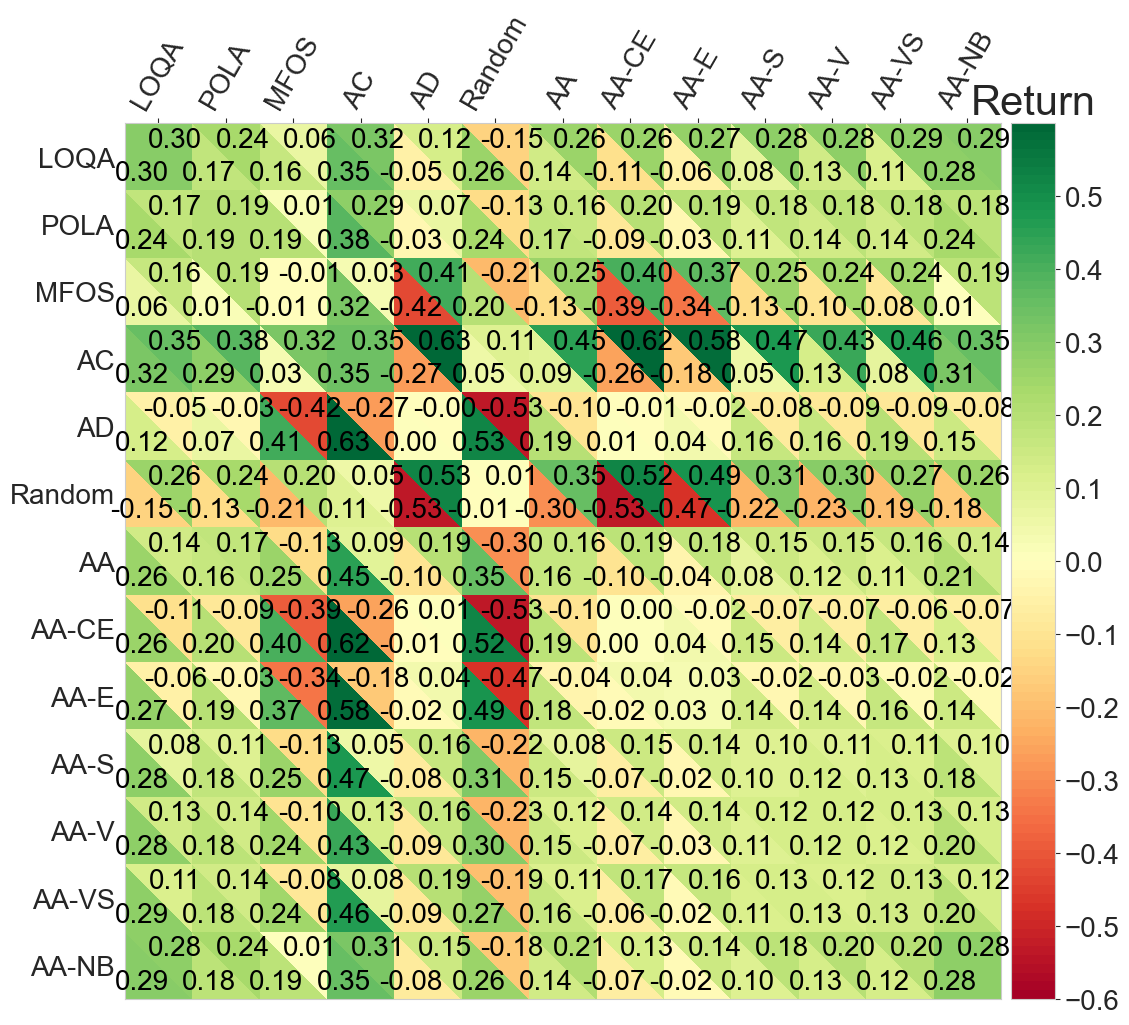

In [28]:
from collections import defaultdict
    
aggregate_config = {
    'loqa': ['loqa_2i4vsulp', 'loqa_2ynm2tt3', 'loqa_2zgb3k1q', 'loqa_3islgbi7', 'loqa_3r9977xr', 'loqa_20htxiyc', 'loqa_30j2wrur', 'loqa_31zh1lui', 'loqa_37u1bq3f', 'loqa_233m1v5f'],
    'loqa_nosp': ['loqa_sp_ablation_'+n for n in ['1ecqpbed', '2ntyuzde', '3cfm0yd6', '3cfulper', '16qp3f50', '20gama5k', '60m01f0h', 'aehjqk0o', 'dqoxc4wd', 'q9u2wcx2']],
    'loqa_norb': ['loqa_rb_ablation_'+n for n in['1abkzsx3','1tieobkn', '2xndvhhp', '2zpspi7d', '3kfuinhg', '3o6xocrm', '3tocppgh', '375wzono', 'd3g7n3wp', 'ejpsvuwk']],
    'pola-new': ['pola_new_0', 'pola_new_1', 'pola_new_2', 'pola_new_3', 'pola_new_4', 'pola_new_5', 'pola_new_6', 'pola_new_7', 'pola_new_8', 'pola_new_9'],
    'Always Cooperate': ['Always Cooperate'],
    'Always Defect': ['Always Defect'],
    'Random': ['random'],
    'mfos': ['mfos_42', 'mfos_43', 'mfos_44', 'mfos_45', 'mfos_46', 'mfos_47', 'mfos_48', 'mfos_49', 'mfos_50', 'mfos_51'],
    'advantage_alignment': ['advantage_alignment_'+n for n in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']],
    'advantage_alignment_mask_cooperative_empathetic': ['advantage_alignment_mask_cooperative_empathetic_'+n for n in ['1', '2', '3', '4', '5', '6', '7', '8', '9']],
    'advantage_alignment_mask_empathetic': ['advantage_alignment_mask_empathetic_'+n for n in ['1', '2', '3', '4', '5', '6', '7', '8', '9']],
    'advantage_alignment_mask_spiteful': ['advantage_alignment_mask_spiteful_'+n for n in ['1', '2', '3', '4', '5', '6', '7', '8', '9']],
    'advantage_alignment_mask_vengeful': ['advantage_alignment_mask_vengeful_'+n for n in ['1', '2', '3', '4', '5', '6', '7', '8', '9']],
    'advantage_alignment_mask_vengeful_spiteful': ['advantage_alignment_mask_vengeful_spiteful_'+n for n in ['1', '2', '3', '4', '5', '6', '7', '8', '9']],
    'advantage_alignment_new_baseline': ['advantage_alignment_new_baseline_'+n for n in ['1', '2', '3', '4', '5', '6', '7', '8', '9']],
}

agent_clean_names = [
 'loqa',
 'loqa_norb',
 'loqa_nosp',
 'pola-new',
 'mfos',
 'Always Cooperate',
 'Always Defect',
 'Random',
 'advantage_alignment',
'advantage_alignment_mask_cooperative_empathetic',
'advantage_alignment_mask_empathetic',
'advantage_alignment_mask_spiteful',
'advantage_alignment_mask_vengeful',
'advantage_alignment_mask_vengeful_spiteful',
'advantage_alignment_new_baseline',
]

name_to_plot_name = {
'Always Cooperate': 'AC',
'Always Defect': 'AD',
'loqa': 'LOQA',
'loqa_norb': 'LOQA-NO-RB',
'loqa_nosp': 'LOQA-NO-SP',
'pola-new': 'POLA',
'Random': 'Random',
'mfos': 'MFOS',
'advantage_alignment': 'AA',
'advantage_alignment_mask_cooperative_empathetic': 'AA-CE',
'advantage_alignment_mask_empathetic': 'AA-E',
'advantage_alignment_mask_spiteful': 'AA-S',
'advantage_alignment_mask_vengeful': 'AA-V',
'advantage_alignment_mask_vengeful_spiteful': 'AA-VS',
'advantage_alignment_new_baseline': 'AA-NB',
}

return_matrix = {}
for k, v in result_matrix.items():
    assert len(v) == 1
    return_matrix[k] = v[0]['mean_rewards']
    
    # fill in the missing entries
all_agent_names = [k1 for k1, k2 in return_matrix.keys()] + [k2 for k1, k2 in return_matrix.keys()]
agent_names = all_agent_names
agent_names = sorted(list(agent_names))
for agent_1 in agent_names:
    for agent_2 in agent_names:
        if (agent_1, agent_2) not in return_matrix:
            if (agent_2, agent_1) in return_matrix:
                ret = return_matrix[(agent_2, agent_1)]
                return_matrix[(agent_1, agent_2)] = (ret[1], ret[0])
            else:
                return_matrix[(agent_1, agent_2)] = (np.nan, np.nan)

# aggregating
def find_umbrella(agent_name, aggregate_config):
    for k, v in aggregate_config.items():
        if agent_name in v:
            return k
    raise ValueError(f'umbrella not found for {agent_name}')

final_matrix = {}
agg_matrix = defaultdict(list)
for k, v in return_matrix.items():
    agent_1, agent_2 = k
    umbrella_1 = find_umbrella(agent_1, aggregate_config)
    umbrella_2 = find_umbrella(agent_2, aggregate_config)
    print(f'{agent_1} vs {agent_2} -> {umbrella_1} vs {umbrella_2}')
    agg_matrix[(umbrella_1, umbrella_2)].append(v)

for k, v in agg_matrix.items():
    final_matrix[k] = np.mean(v, axis=0)
    print(f'{k}: {len(v)} samples, v:{v} v_mean: {final_matrix[k]}')
    print('='*20)

return_matrix = final_matrix


plot_league_result(return_matrix, agent_clean_names, name_to_plot_name, fig_size=12, to_remove_agents=['loqa_nosp', 'loqa_norb'])
# save the figure to pdf
plt.savefig('league_result.pdf', bbox_inches='tight')
plt.show()

In [ ]:
return_matrix.keys()